In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [3]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, visualize, statistical_tests



# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars.parquet")

In [6]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... GOK_ppn GOK_notation GOK_j  \
ppn                           ...                              
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
1642067407              None  ...    None         None  None   
1734538619              None  ...    None         None  None   
...                      ...  ...     ...          ...   ...   
800133854              Peter  ...    None         None  None   
800133854              Peter  ...    None         None  None   
800133250               None  ...    None         None  None   
800132432               None  ...    None         None  None   
800132432               None  ...    None         None  None   

                           signatur_place  \
ppn                                         
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
1642067407                           None   
1734538619                           None   
...                               

In [7]:
", ".join(df.columns.tolist())


'ppn, medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, ILNs_libraries'

In [8]:
df.shape

(1094658, 61)

# Keywords

In [10]:
keywords_columns_lt = [column for column in df.columns.tolist() if "keyword" in column if "ppn" not in column]

In [11]:
keywords_columns_lt

['keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC']

In [12]:
for keywords_column in keywords_columns_lt:
    print("\n\n", keywords_column, df[keywords_column].dropna().head(1))




 keyword_RSWK ppn
021627924    Bourbonnais|Mundart
Name: keyword_RSWK, dtype: object


 keyword_K10plus ppn
1678415065    Frankreich|Buchhandel|Buchproduktion|DA-3
Name: keyword_K10plus, dtype: object


 keyword_project Series([], Name: keyword_project, dtype: float64)


 keyword_local ppn
015609812     Protestbewegung| Internationalismus| Chile| G...
Name: keyword_local, dtype: object


 keyword_045D ppn
110557010X    Vereinigte Staaten|Bilaterale internationale B...
Name: keyword_045D, dtype: object


 keyword_LoC ppn
780075951    Rousseau, Jean-Jacques
Name: keyword_LoC, dtype: object


In [13]:
df[keywords_columns_lt].dropna(how="all")

keyword_RSWK                                keyword_K10plus  \
ppn                                                                      
1678415065         None      Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None      Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None      Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None      Frankreich|Buchhandel|Buchproduktion|DA-3   
1678415065         None      Frankreich|Buchhandel|Buchproduktion|DA-3   
...                 ...                                            ...   
800141377          None                          Französisch|Literatur   
800141377          None                          Französisch|Literatur   
800135350          None  Spanien|Städtebau|Korruption|Bekämpfung|Recht   
800132432          None                     Galicisch|Bedrohte Sprache   
800132432          None                     Galicisch|Bedrohte Sprache   

            keyword_project keyword_local keyword_045D  \
ppn                                                      
1678415065              NaN          None         None   
1678415065              NaN          None         None   
1678415065              NaN          None         None   
1678415065              NaN          None         None   
1678415065              NaN          None         None   
...                     ...           ...          ...   
800141377               NaN          None         None   
800141377               NaN          None         None   
800135350               NaN          None         None   
800132432               NaN          None         None   
800132432               NaN          None         None   

                                                  keyword_LoC  
ppn                                                            
1678415065                                               None  
1678415065                                               None  
1678415065                                               None  
1678415065                                               None  
1678415065                                               None  
...                                                       ...  
800141377                                                None  
800141377                                                None  
800135350                                                None  
800132432   Galician language|Languages in contact|Endange...  
800132432   Galician language|Languages in contact|Endange...  

[701762 rows x 6 columns]

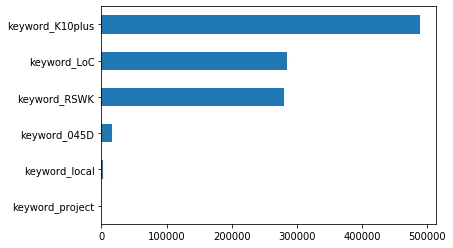

In [14]:
df[keywords_columns_lt].dropna(how="all").notna().sum().sort_values().plot.barh()

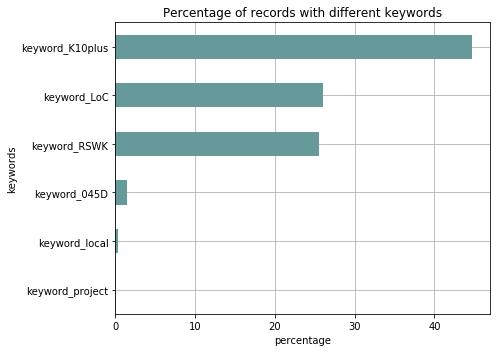

In [17]:
visualize.plot_bar_not_nas(df[keywords_columns_lt], figsize = (7,5), title = "Percentage of records with different keywords", xlabel = "percentage", ylabel = "keywords", figure_name= "bar_not_na_keywords")

In [18]:
df[keywords_columns_lt].dropna(how="all").shape[0] / df.shape[0] * 100

64.10787661534471

In [19]:
for column in keywords_columns_lt:
    df[column] = df[column].fillna("").astype(str)

In [20]:
df['keywords'] = df[keywords_columns_lt].agg('|'.join, axis=1)

In [21]:
df["keywords"] = df["keywords"].str.replace("\|+","|")
df["keywords"] = df["keywords"].str.replace("(?:^\||\|$)+","")

In [22]:
df["keywords"]

ppn
309277221                                                      
309277221                                                      
309277221                                                      
1642067407                                                     
1734538619                                                     
                                    ...                        
800133854                                                      
800133854                                                      
800133250                                                      
800132432     Galicisch|Bedrohte Sprache|Galician language|L...
800132432     Galicisch|Bedrohte Sprache|Galician language|L...
Name: keywords, Length: 1094658, dtype: object

In [23]:
df = df.loc[df["keywords"] != ""]

In [24]:
df.shape

(701762, 62)

In [25]:
df["keywords"].value_counts()

Spanisch                                                                                                                                                                                                              2430
Französisch                                                                                                                                                                                                           2109
Französisch|Literatur                                                                                                                                                                                                 1997
Italienisch                                                                                                                                                                                                           1634
Italienisch|Literatur                                                                                                       

In [26]:
keywords_df = tokenize.tokenize_column(df, "keywords",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[^\|]+\\b', max_features = 1000, add_name_of_original_column = False)

Shape of tokens:  (701762, 1000)
Shape of tokens after filtering:  (701762, 1000)


In [27]:
keywords_df

französisch  literatur  spanisch  frankreich  italienisch  de-101  \
1678415065            0          0         0           1            0       0   
1678415065            0          0         0           1            0       0   
1678415065            0          0         0           1            0       0   
1678415065            0          0         0           1            0       0   
1678415065            0          0         0           1            0       0   
...                 ...        ...       ...         ...          ...     ...   
800141377             1          1         0           0            0       0   
800141377             1          1         0           0            0       0   
800135350             0          0         0           0            0       0   
800132432             0          0         0           0            0       0   
800132432             0          0         0           0            0       0   

            bvb  history and criticism  deutsch  france  ...  \
1678415065    0                      0        0       0  ...   
1678415065    0                      0        0       0  ...   
1678415065    0                      0        0       0  ...   
1678415065    0                      0        0       0  ...   
1678415065    0                      0        0       0  ...   
...         ...                    ...      ...     ...  ...   
800141377     0                      0        0       0  ...   
800141377     0                      0        0       0  ...   
800135350     0                      0        0       0  ...   
800132432     0                      0        0       0  ...   
800132432     0                      0        0       0  ...   

            eroberung lateinamerikas  raeto-romance language  mythologie  \
1678415065                         0                       0           0   
1678415065                         0                       0           0   
1678415065                         0                       0           0   
1678415065                         0                       0           0   
1678415065                         0                       0           0   
...                              ...                     ...         ...   
800141377                          0                       0           0   
800141377                          0                       0           0   
800135350                          0                       0           0   
800132432                          0                       0           0   
800132432                          0                       0           0   

            kanon  europäische integration  foscolo  feminism  \
1678415065      0                        0        0         0   
1678415065      0                        0        0         0   
1678415065      0                        0        0         0   
1678415065      0                        0        0         0   
1678415065      0                        0        0         0   
...           ...                      ...      ...       ...   
800141377       0                        0        0         0   
800141377       0                        0        0         0   
800135350       0                        0        0         0   
800132432       0                        0        0         0   
800132432       0                        0        0         0   

            postcolonialism in literature  klitisierung  \
1678415065                              0             0   
1678415065                              0             0   
1678415065                              0             0   
1678415065                              0             0   
1678415065                              0             0   
...                                   ...           ...   
800141377                               0             0   
800141377                               0             0   
800135350                               0    

In [28]:
for column in keywords_df.columns.tolist():
    if len(column) < 5:
        print(column)


bvb
bsz
obv
frau
film
hbz
da-3
da3
verb
kuba
usa
zola
peru
hugo
vega
gide
sand
raum
exil
law
epik
ark
tod
eco
kind
cuba
zeit
mann
mord
jews
rom
levi
buch
epos
bild
text
name
sohn
held
oper
art
lied
adel
char
paz
hof
ich
dorf


In [29]:
keywords_df.iloc[:,0:20].sum()

französisch              140015
literatur                122650
spanisch                  79419
frankreich                55596
italienisch               54282
de-101                    53570
bvb                       43698
history and criticism     42507
deutsch                   33461
france                    28887
history                   25991
spanish language          25697
rezeption                 24896
french language           24388
romanische sprachen       23360
20th century              22495
roman                     22334
deutschland               20088
spanien                   19971
lyrik                     19921
dtype: int64

In [30]:
keywords_to_drop = ["de-101", "bvb", "bsz", "obv", 'da-3', 'da3', 'de-25/sred20', 'de-21/19', 'de-25/sred19','de-576',"de-600", "hbz"]

for keyword in keywords_to_drop:
    if keyword in keywords_df.columns.tolist():
        keywords_df.drop(keyword, axis="columns", inplace=True)


In [31]:
keywords_df.iloc[:,30:50].columns.tolist()

['kultur',
 'kongress',
 'linguistik',
 '19th century',
 'theater',
 'sprache',
 'italian literature',
 'französischunterricht',
 'biography',
 'spanish literature',
 '18th century',
 'proust',
 'frau',
 'schriftsteller',
 'romance languages',
 'hispanoamerika',
 'paris',
 'englisch',
 'authors, french',
 'dictionaries']

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


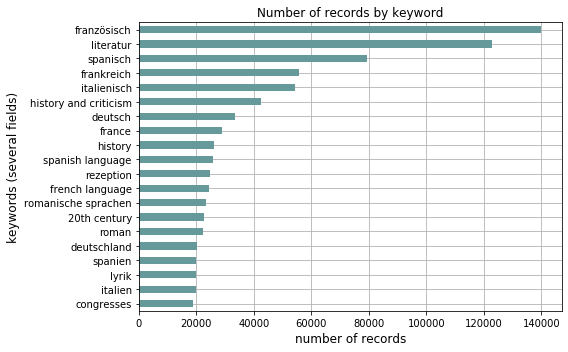

In [32]:
visualize.plot_bars(keywords_df.iloc[:,0:20], figsize= (8,5), title = "Number of records by keyword", xlabel = "number of records", ylabel = "keywords (several fields)", figure_name= "bar_keywords_number")

In [33]:
keywords_lt = keywords_df.columns.tolist()

In [34]:
for column in keywords_lt:
    if len(column) < 1:
        print(column)


In [35]:
df = pd.concat([df, keywords_df], axis=1)

In [36]:
years_keywords_df = df.groupby(["year_publication"])[keywords_lt].sum()
years_keywords_df

französisch  literatur  spanisch  frankreich  italienisch  \
year_publication                                                              
1980                     2064       1425       758         932          549   
1981                     2046       1253       525         598          384   
1982                     2730       2179       697         750          612   
1983                     2959       2448       855         788          795   
1984                     3471       3063       804        1215          889   
1985                     2732       1996      1066        1394          583   
1986                     3279       2169      1438        1123          819   
1987                     2834       1930      1111        1102          868   
1988                     3288       2436      1166        1076         1109   
1989                     3369       2627      1191        1050         1197   
1990                     3118       2677      1749        1265         1573   
1991                     3805       2940      1855        1177         1455   
1992                     3304       2735      1601        1443         1343   
1993                     3503       2609      1781        1497         1421   
1994                     4048       3221      2025        1139         1563   
1995                     4130       3090      2191        1489         1661   
1996                     4170       3603      2020        1734         1976   
1997                     4239       3292      2187        1429         1751   
1998                     5181       3432      2135        1824         1574   
1999                     4281       3885      2035        2345         1920   
2000                     4319       3767      2578        1889         2073   
2001                     4643       3246      2650        1947         1777   
2002                     4166       3767      2561        1786         1707   
2003                     3942       4323      2371        1555         2072   
2004                     3800       4062      2968        1710         1762   
2005                     4341       4286      3056        1785         2196   
2006                     4517       4036      2911        1912         1720   
2007                     4393       3692      2737        1821         1733   
2008                     4252       3660      2719        1819         1612   
2009                     3697       3075      2717        1285         1405   
2010                     3671       3631      2643        1403         1396   
2011                     3883       3331      2868        1549         1536   
2012                     3706       3464      3029        1388         1666   
2013                     3201       3383      2553        1446         1186   
2014                     2766       2761      2472        1044          968   
2015                     2762       2951      2057        1224         1181   
2016                     3006       3256      2105        1529         1126   
2017                     2383       2809      1713        1045         1017   
2018                     2068       3085      1742        1020         1196   
2019                     1948       3055      1779        1069          911   

                  history and criticism  deutsch  france  history  \
year_publication                                                    
1980                                442      238     250      199   
1981                                489      353     201      235   
1982                                639      439     293      302   
1983                                678      411     333      316   
1984                                569      659     585      307   
1985                                384      411     708      255   
1986                                860      582     555      683   
1987                                645      570     442      506   
1988     

In [37]:
years_keywords_rel_df = (years_keywords_df.loc[:].div(years_keywords_df.sum(axis='columns'), axis="index")*100).round(2)

In [38]:
years_keywords_rel_df

französisch  literatur  spanisch  frankreich  italienisch  \
year_publication                                                              
1980                     8.13       5.62      2.99        3.67         2.16   
1981                     9.29       5.69      2.38        2.71         1.74   
1982                     9.65       7.71      2.46        2.65         2.16   
1983                     9.35       7.73      2.70        2.49         2.51   
1984                     9.23       8.14      2.14        3.23         2.36   
1985                     8.17       5.97      3.19        4.17         1.74   
1986                     7.48       4.95      3.28        2.56         1.87   
1987                     7.82       5.33      3.07        3.04         2.40   
1988                     7.51       5.56      2.66        2.46         2.53   
1989                     6.81       5.31      2.41        2.12         2.42   
1990                     5.77       4.95      3.24        2.34         2.91   
1991                     6.17       4.77      3.01        1.91         2.36   
1992                     5.40       4.47      2.61        2.36         2.19   
1993                     5.39       4.02      2.74        2.30         2.19   
1994                     5.22       4.15      2.61        1.47         2.01   
1995                     5.31       3.98      2.82        1.92         2.14   
1996                     5.38       4.65      2.61        2.24         2.55   
1997                     5.83       4.52      3.01        1.96         2.41   
1998                     7.27       4.82      3.00        2.56         2.21   
1999                     5.36       4.86      2.55        2.94         2.40   
2000                     5.31       4.63      3.17        2.32         2.55   
2001                     5.66       3.96      3.23        2.37         2.17   
2002                     4.80       4.34      2.95        2.06         1.97   
2003                     4.58       5.03      2.76        1.81         2.41   
2004                     4.14       4.42      3.23        1.86         1.92   
2005                     4.85       4.79      3.41        1.99         2.45   
2006                     5.61       5.02      3.62        2.38         2.14   
2007                     5.78       4.85      3.60        2.39         2.28   
2008                     5.69       4.90      3.64        2.43         2.16   
2009                     5.37       4.46      3.94        1.87         2.04   
2010                     5.13       5.07      3.69        1.96         1.95   
2011                     5.02       4.30      3.70        2.00         1.98   
2012                     5.23       4.88      4.27        1.96         2.35   
2013                     4.97       5.25      3.97        2.25         1.84   
2014                     4.92       4.92      4.40        1.86         1.72   
2015                     4.73       5.05      3.52        2.10         2.02   
2016                     4.53       4.90      3.17        2.30         1.70   
2017                     4.39       5.18      3.16        1.93         1.88   
2018                     4.07       6.07      3.43        2.01         2.35   
2019                     4.90       7.69      4.48        2.69         2.29   

                  history and criticism  deutsch  france  history  \
year_publication                                                    
1980                               1.74     0.94    0.99     0.78   
1981                               2.22     1.60    0.91     1.07   
1982                               2.26     1.55    1.04     1.07   
1983                               2.14     1.30    1.05     1.00   
1984                               1.51     1.75    1.56     0.82   
1985                               1.15     1.23    2.12     0.76   
1986                               1.96     1.33    1.27     1.56   
1987                               1.78     1.57    1.22     1.40   
1988     

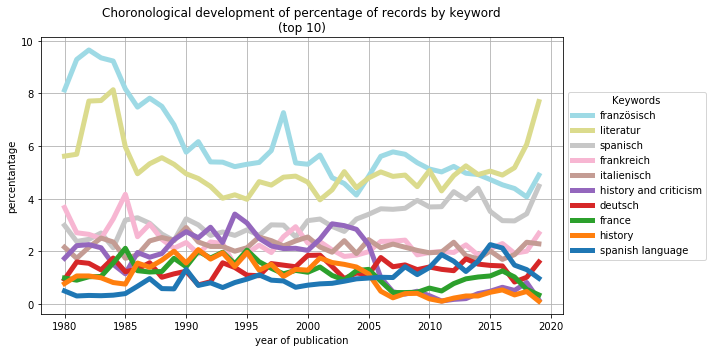

In [39]:
visualize.plot_lines(years_keywords_rel_df.iloc[:,0:10], title = "Choronological development of percentage of records by keyword\n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10", title_legend = "Keywords")


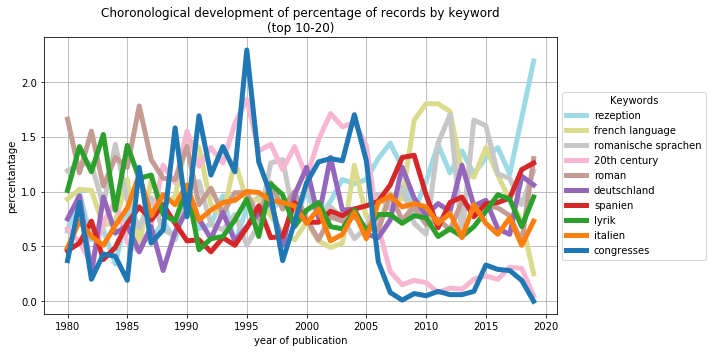

In [40]:
visualize.plot_lines(years_keywords_rel_df.iloc[:,10:20], title = "Choronological development of percentage of records by keyword\n(top 10-20)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_20", title_legend = "Keywords")


In [41]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).index.tolist()[0:20]

['literatur',
 'rezeption',
 'spanisch',
 'spanien',
 'übersetzung',
 'deutsch',
 'argentinien',
 'politik',
 'kultur',
 'film',
 'paris',
 'spanish language',
 'sprachkontakt',
 'kunst',
 'geschichte',
 'siglo de oro',
 'mexiko',
 'mehrsprachigkeit',
 'gesellschaft',
 'frau']

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


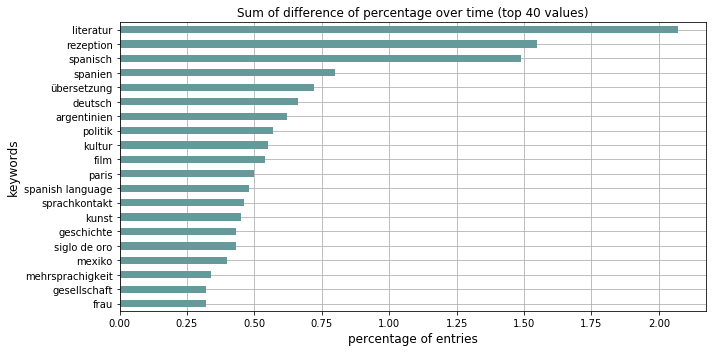

In [42]:
visualize.plot_bars(years_keywords_rel_df.diff(), head = 20, percentage = False, title = "Sum of difference of percentage over time (top 40 values)", xlabel= "percentage of entries", ylabel = "keywords", figure_name = "bar_diff_keywords")

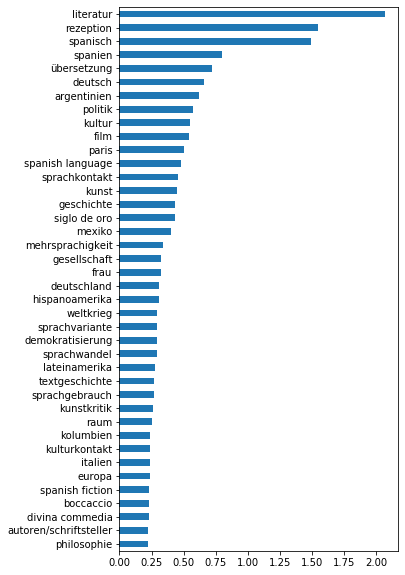

In [44]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).head(40).sort_values(ascending=True).plot.barh(figsize=(5,10))

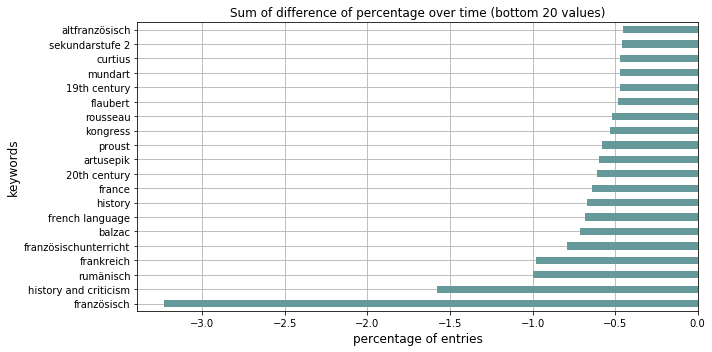

In [45]:
visualize.plot_bars(years_keywords_rel_df.diff(), tail = 20, percentage = False, title = "Sum of difference of percentage over time (bottom 20 values)", xlabel= "percentage of entries", ylabel = "keywords", figure_name = "bar_diff_keywords_bottom")

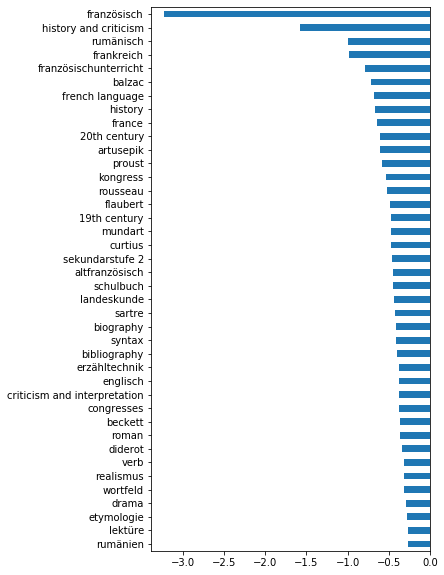

In [46]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).tail(40).plot.barh(figsize=(5,10))

In [47]:
regression_results_df = statistical_tests.calculate_regression_line(years_keywords_rel_df)

In [48]:
regression_results_df.index = regression_results_df.column

In [49]:
regression_results_df

column     slope   intercept    rvalue  \
column                                                                         
spanisch                            spanisch  0.035565  -67.941174  0.739642   
spanish language            spanish language  0.032360  -63.719270  0.797084   
rezeption                          rezeption  0.025145  -49.297984  0.815744   
italian language            italian language  0.016404  -32.302178  0.651464   
spanien                              spanien  0.013976  -27.155232  0.700828   
...                                      ...       ...         ...       ...   
france                                france -0.021781   44.722711 -0.551324   
frankreich                        frankreich -0.022893   48.115670 -0.515845   
history                              history -0.032381   65.778536 -0.622046   
history and criticism  history and criticism -0.055374  112.394656 -0.636974   
französisch                      französisch -0.108679  223.309509 -0.821948   

                             pvalue    stderr  
column                                         
spanisch               4.967877e-08  0.005250  
spanish language       7.541397e-10  0.003977  
rezeption              1.436713e-10  0.002892  
italian language       5.294453e-06  0.003099  
spanien                4.764233e-07  0.002308  
...                             ...       ...  
france                 2.268324e-04  0.005347  
frankreich             6.571652e-04  0.006168  
history                1.828432e-05  0.006612  
history and criticism  9.907367e-06  0.010871  
französisch            7.940398e-11  0.012217  

[988 rows x 6 columns]

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


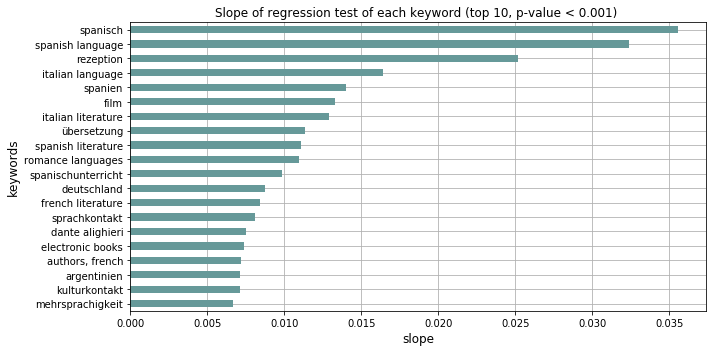

In [73]:
visualize.plot_bars(regression_results_df[["slope"]].head(20).T, title ="Slope of regression test of each keyword (top 10, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords", figure_name = "keywords_slope_top")

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


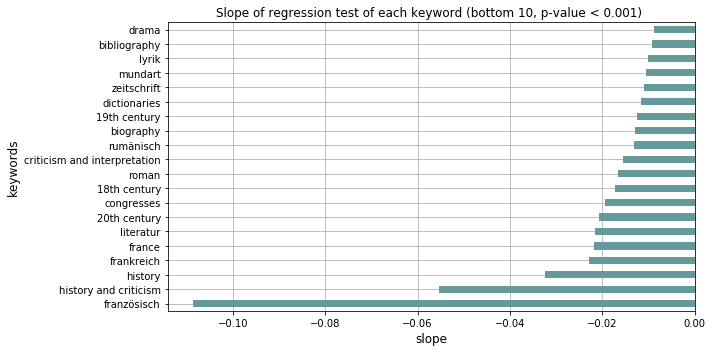

In [72]:
visualize.plot_bars(regression_results_df[["slope"]].tail(20).T, title ="Slope of regression test of each keyword (bottom 10, p-value < 0.001) ", xlabel ="slope", ylabel = "keywords", figure_name = "keywords_slope_bottom")

In [62]:
regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] > 0) ].sort_values(by="slope", ascending=False).head(20)

column     slope  intercept    rvalue  \
column                                                                  
spanisch                      spanisch  0.035565 -67.941174  0.739642   
spanish language      spanish language  0.032360 -63.719270  0.797084   
rezeption                    rezeption  0.025145 -49.297984  0.815744   
italian language      italian language  0.016404 -32.302178  0.651464   
spanien                        spanien  0.013976 -27.155232  0.700828   
film                              film  0.013310 -26.367982  0.887031   
italian literature  italian literature  0.012871 -25.388279  0.794487   
übersetzung                übersetzung  0.011355 -22.167016  0.629756   
spanish literature  spanish literature  0.011091 -21.841193  0.706970   
romance languages    romance languages  0.010945 -21.574583  0.519196   
spanischunterricht  spanischunterricht  0.009841 -19.491756  0.844331   
sprachkontakt            sprachkontakt  0.008117 -16.021713  0.627243   
dante alighieri        dante alighieri  0.007515 -14.841011  0.748141   
electronic books      electronic books  0.007372 -14.596404  0.558187   
authors, french        authors, french  0.007191 -14.086644  0.695070   
argentinien                argentinien  0.007148 -14.096361  0.591389   
kulturkontakt            kulturkontakt  0.007096 -14.071322  0.752347   
mehrsprachigkeit      mehrsprachigkeit  0.006660 -13.180495  0.760667   
geschichte                  geschichte  0.006518 -12.837888  0.671078   
kunst                            kunst  0.006413 -12.565310  0.509778   

                          pvalue    stderr  
column                                      
spanisch            4.967877e-08  0.005250  
spanish language    7.541397e-10  0.003977  
rezeption           1.436713e-10  0.002892  
italian language    5.294453e-06  0.003099  
spanien             4.764233e-07  0.002308  
film                2.537401e-14  0.001124  
italian literature  9.370848e-10  0.001596  
übersetzung         1.337756e-05  0.002272  
spanish literature  3.413002e-07  0.001800  
romance languages   5.972867e-04  0.002923  
spanischunterricht  7.606439e-12  0.001013  
sprachkontakt       1.482582e-05  0.001635  
dante alighieri     2.870535e-08  0.001081  
electronic books    1.820846e-04  0.001778  
authors, french     6.465156e-07  0.001207  
argentinien         5.856267e-05  0.001581  
kulturkontakt       2.170691e-08  0.001008  
mehrsprachigkeit    1.228386e-08  0.000922  
geschichte          2.146433e-06  0.001168  
kunst               7.793310e-04  0.001756

In [63]:
regression_results_df.loc[(regression_results_df["pvalue"] < 0.001) & (regression_results_df["slope"] < 0) ]

column  \
column                                                                         
synonym                                                              synonym   
sarraute                                                            sarraute   
sprachschwierigkeit                                      sprachschwierigkeit   
montesquieu                                                      montesquieu   
ronsard                                                              ronsard   
rechtschreibung                                              rechtschreibung   
foreign countries                                          foreign countries   
gracq                                                                  gracq   
sprichwort                                                        sprichwort   
robbe-grillet                                                  robbe-grillet   
sources                                                              sources   
technique                                                          technique   
catalogs                                                            catalogs   
semiotik                                                            semiotik   
political and social views                        political and social views   
ionesco                                                              ionesco   
corneille                                                          corneille   
to 1500                                                              to 1500   
essais                                                                essais   
civilization, medieval, in literature  civilization, medieval, in literature   
novelle                                                              novelle   
rimbaud                                                              rimbaud   
dialects                                                            dialects   
pirandello                                                        pirandello   
zola                                                                    zola   
grammar                                                              grammar   
komödie                                                              komödie   
in literature                                                  in literature   
renaissance                                                      renaissance   
knowledge                                                          knowledge   
syntax                                                                syntax   
verb                                                                    verb   
17th century                                                    17th century   
sartre                                                                sartre   
surrealismus                                                    surrealismus   
diderot                                                              diderot   
drama                                                                  drama   
bibliography                                                    bibliography   
mundart                                                              mundart   
zeitschrift                                                      zeitschrift   
dictionaries                                                    dictionaries   
19th century                                                    19th century   
biography                                                          biography   
rumänisch                                                          rumänisch   
roman                                                                  roman   
18th century                                                    18th century   
france                                                                france   
frankreich                                                        frankreich   
history                                                              h

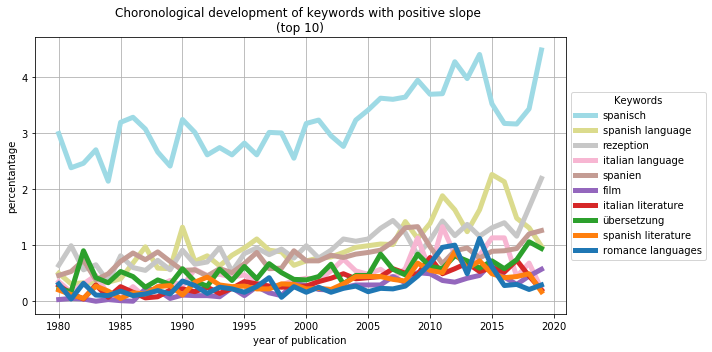

In [76]:
visualize.plot_lines(years_keywords_rel_df[regression_results_df[["slope"]].head(10).index], title = "Choronological development of keywords with positive slope \n(top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10_statistical_top", title_legend = "Keywords")



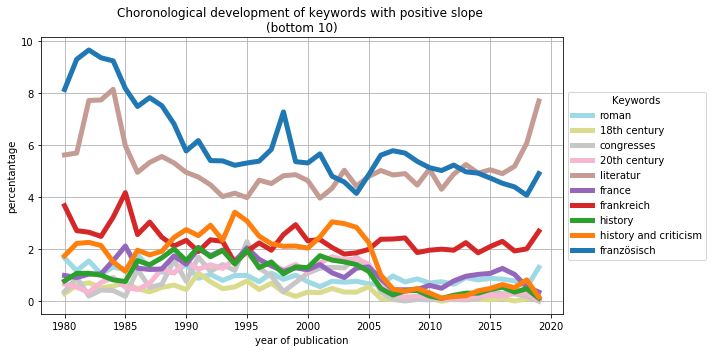

In [77]:
visualize.plot_lines(years_keywords_rel_df[regression_results_df[["slope"]].tail(10).index], title = "Choronological development of keywords with positive slope \n(bottom 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_keywords_10_statistical_bottom", title_legend = "Keywords")


In [64]:
keywords_df.iloc[:,0:5].corr()

französisch  literatur  spanisch  frankreich  italienisch
französisch     1.000000   0.293192 -0.071562    0.092372    -0.041743
literatur       0.293192   1.000000  0.073972    0.066487     0.135032
spanisch       -0.071562   0.073972  1.000000   -0.056178    -0.031297
frankreich      0.092372   0.066487 -0.056178    1.000000    -0.041062
italienisch    -0.041743   0.135032 -0.031297   -0.041062     1.000000

In [65]:
keywords_df.iloc[:,0:20].corr()

französisch  literatur  spanisch  frankreich  \
französisch               1.000000   0.293192 -0.071562    0.092372   
literatur                 0.293192   1.000000  0.073972    0.066487   
spanisch                 -0.071562   0.073972  1.000000   -0.056178   
frankreich                0.092372   0.066487 -0.056178    1.000000   
italienisch              -0.041743   0.135032 -0.031297   -0.041062   
history and criticism     0.071403   0.112539  0.017833    0.006710   
deutsch                   0.164434   0.075458  0.074169    0.005780   
france                    0.045742   0.013772 -0.034763    0.213544   
history                   0.012247   0.001627 -0.015243    0.067772   
spanish language         -0.037082  -0.036555  0.275404   -0.025920   
rezeption                 0.003641   0.106928  0.000726    0.035274   
french language           0.196342  -0.032188 -0.024812    0.009908   
romanische sprachen      -0.035460   0.093741 -0.029739   -0.024611   
20th century             -0.007400   0.029332  0.003372    0.005809   
roman                     0.094245  -0.015639  0.028897   -0.007793   
deutschland               0.012791   0.048539 -0.015677    0.267741   
spanien                  -0.044962   0.022172  0.077290   -0.012751   
lyrik                     0.035108  -0.026109  0.025609   -0.016832   
italien                  -0.035940   0.028377 -0.034460    0.007312   
congresses                0.005612   0.036891  0.003492    0.017832   

                       italienisch  history and criticism   deutsch    france  \
französisch              -0.041743               0.071403  0.164434  0.045742   
literatur                 0.135032               0.112539  0.075458  0.013772   
spanisch                 -0.031297               0.017833  0.074169 -0.034763   
frankreich               -0.041062               0.006710  0.005780  0.213544   
italienisch               1.000000               0.031439  0.074114 -0.025174   
history and criticism     0.031439               1.000000  0.010821  0.125319   
deutsch                   0.074114               0.010821  1.000000 -0.007520   
france                   -0.025174               0.125319 -0.007520  1.000000   
history                  -0.007843               0.165926 -0.008811  0.363332   
spanish language         -0.022836              -0.019571  0.005855 -0.016104   
rezeption                 0.015605               0.041086  0.041025  0.013278   
french language          -0.016152              -0.016009  0.023337  0.050007   
romanische sprachen      -0.009870              -0.015157  0.009207 -0.016081   
20th century              0.006872               0.363339 -0.011487  0.127270   
roman                    -0.004723               0.058543 -0.006989 -0.000888   
deutschland              -0.009843               0.004065  0.075926  0.025327   
spanien                  -0.026971               0.006597 -0.015916 -0.013432   
lyrik                     0.065027               0.029441 -0.008339 -0.011959   
italien                   0.100797               0.007564  0.000021 -0.012992   
congresses                0.012939               0.145530  0.011898  0.080376   

                        history  spanish language  rezeption  french language  \
französisch            0.012247         -0.037082   0.003641         0.196342   
literatur              0.001627         -0.036555   0.106928        -0.032188   
spanisch              -0.015243          0.275404   0.000726        -0.024812   
frankreich             0.067772         -0.025920   0.035274         0.009908   
italienisch           -0.007843         -0.022836   0.015605        -0.016152   
history and criticism  0.165926         -0.019571   0.041086        -0.016009   
deutsch               -0.008811          0.005855   0.041025         0.023337   
france                 0.363332         -0.016104   0.013278         0.050007   
history                1.000000          0.003705   0.018083         0.016935   
spanish language   

C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


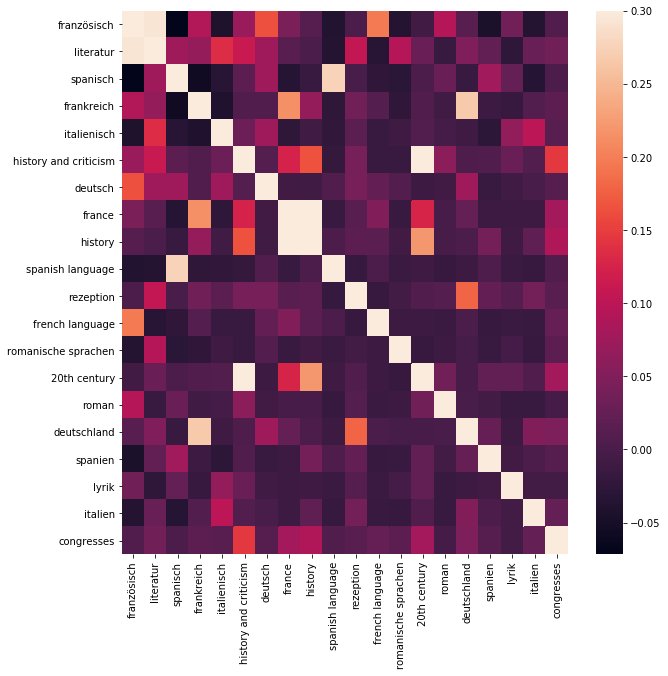

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
#fig.set_size(10, 10)
sns.heatmap(keywords_df.iloc[:,0:20].corr(), annot=False, ax=ax, vmax=0.3)
fig.show()

In [69]:
keywords_df.columns.tolist()[0:20]

['französisch',
 'literatur',
 'spanisch',
 'frankreich',
 'italienisch',
 'history and criticism',
 'deutsch',
 'france',
 'history',
 'spanish language',
 'rezeption',
 'french language',
 'romanische sprachen',
 '20th century',
 'roman',
 'deutschland',
 'spanien',
 'lyrik',
 'italien',
 'congresses']

In [70]:
languages_lt = sorted([
 'französisch',
 'spanisch',
 'italienisch',
 'deutsch',
 'romanische sprachen', 
 'portugiesisch',
])

disciplines_lt = [
 'literatur',
 'linguistik']




C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


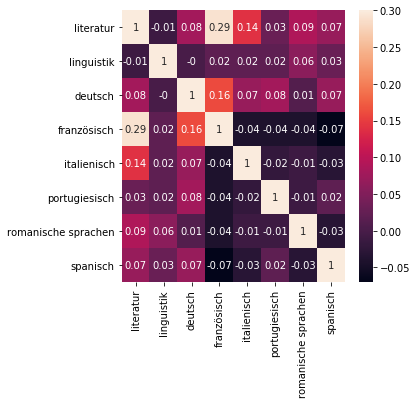

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
#fig.set_size(10, 10)
sns.heatmap(keywords_df[disciplines_lt + languages_lt].corr().round(2), annot=True, ax=ax, vmax=0.3)
fig.show()